**blog:**
    https://blog.csdn.net/fly_saint/article/details/86364216  <br/>
**github:**
    https://github.com/flysaint/Write_A_Data_Science_Blog_Pos

## 1 商业理解（business understanding）--Problem I want to solve:
I just split Seatte houses into two parts by the price.The high price house's price is more than median price (119).The low price house's price is less than median price(119).<br/>
then I want to find out that:<br/>
**Question1**. What's the differece between high price houses and low price houses.<br/>
**Question2**. If you are a low/high house host,what should you do to improve the review score value?<br/>
**Question3**. Question3 If we are the house hosts,and if we want to be a superhost,what should we do while we are high price house host or low price house host?


In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# import ImputingValues as t
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from datetime import datetime
from sklearn.model_selection import GridSearchCV
import random

import numbers
# from helper import *
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
%matplotlib inline

## 2. 数据理解（data understanding）

### 2.1 Load the data

In [2]:
path = 'D:/Code/Udacity/02_DataScientist/Write_A_Data_Science_Blog_Post/My_Analysis_Of_ArBNB_new/data/Seattle_AirBNB_Data/'

In [3]:
df_Seattle_listings = pd.read_csv(path + 'listings.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_Seattle_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20181011130926,2018-10-11,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,NaN,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,"We are a family of three, who live next door a...",four day minimum stay,NaN,NaN,https://a0.muscache.com/im/pictures/ac08892c-f...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/55737...,https://a0.muscache.com/im/pictures/user/55737...,Minor,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122.0,Seattle,"Seattle, WA",US,United States,47.610819,-122.290816,t,House,Entire home/apt,8,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$275.00,8,$20.00,4,300,today,t,0,16,40,315,2018-10-11,20,2008-09-15,2018-09-18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,2,0.16
1,4291,https://www.airbnb.com/rooms/4291,20181011130926,2018-10-11,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,NaN,NaN,NaN,"We do not live on the property, however we do ...",We ask that you please use nearby street parki...,NaN,NaN,https://a0.muscache.com/im/pictures/19407574/6...,NaN,35749,https://www.airbnb.com/users/show/35749,Jess & Joey,2009-09-02,"Seattle, Washington, United States",We're a former Seattle couple who just couldn'...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/a3c77...,https://a0.muscache.com/im/pictures/user/a3c77...,Roosevelt,5,5,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Seattle, WA, United States",Roosevelt,Roosevelt,Other neighborhoods,Seattle,WA,98115.0,Seattle,"Seattle, WA",US,United States,47.687801,-122.313427,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",NaN,$82.00,$525.00,"$1,925.00",NaN,$30.00,1,$0.00,2,60,3 weeks ago,t,30,60,90,365,2018-10-11,62,2013-07-01,2018-10-06,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,NaN,{WASHINGTON},f,f,moderate,f,f,5,0.96
2,5682,https://www.airbnb.com/rooms/5682,20

In [4]:
def Value_counts(das, nhead = 5):
    # TODO value_counts --> reset_index--> rename_aixs
    tmp = das.value_counts().reset_index().rename_axis({'index':das.name},axis = 1)
    # TODO 将 前n位值计算出来
    value = pd.DataFrame(['value {}'.format(i) for i in range(nhead)],index = range(nhead)).join(tmp.iloc[:,0],how = 'left').set_index(0).T
    # TODO 将前n 位值的数量 合并计算出来
    freq = pd.DataFrame(['freq {}'.format(i) for i in range(nhead)],index = range(nhead)).join(tmp.iloc[:,1],how = 'left').set_index(0).T
    # TODO 将 NAN值的数量计算出来
    nnull = das.isnull().sum()
    # TODO 建立新的Df，计算其他值、空值的频数。样本总数 - 空值数 - freq中的所有频数(包括空值)
    freqother = pd.DataFrame([nnull,das.shape[0] - nnull - freq.sum(axis = 1).sum()],index = ['freqNull','freqOther']).T.rename_axis({0:das.name})
    # TODO concat 将 value,freq，freqother全部合并
    op = pd.concat([value,freq,freqother],axis = 1)
    return(op)
def Summary(da):
    # TODO 三部分相关联。type，n;describe部分;value_count计算的所有列部分
    op = pd.concat([pd.DataFrame({"type": da.dtypes, "n": da.notnull().sum(axis = 0)}), da.describe().T.iloc[:,1:],
                    pd.concat(map(lambda i: Value_counts(da.loc[:,i]), da.columns))], axis = 1).loc[da.columns]
    op.index.name = "Columns"
    return(op)


In [5]:
def MissingCategorial(df,x):
    missing_vals = df[x].map(lambda x: int(x!=x))
    return sum(missing_vals)*1.0/df.shape[0]

def MissingContinuous(df,x):
    missing_vals = df[x].map(lambda x: int(np.isnan(x)))
    return sum(missing_vals) * 1.0 / df.shape[0]

In [6]:
df_Seattle_listings_summary = Summary(df_Seattle_listings).reset_index()

df_Seattle_listings_summary.to_csv(path+'df_Seattle_listings_summary.csv')

### The table blow show us that: 

**n.** The length of the col value.<br/>
**type.** The type of the col.<br/>
**mean.std.min.** The mean,std,min of the col,and of course if the col is object type,it will be null. <br/>
**25%,50%,75%.** The quantile of col.<br/>
**value0,value1,value2,value3,value4,value5.** The most five proportion value of the col.<br/>
**freq0,freq 1,freq 2,freq 4,freq 4.** The most five proportion value's count of the col.<br/>
**freqNull,freqOther.** The Null/Other value's count of the col.<br/>

In [7]:
df_Seattle_listings_summary

,Columns,n,type,mean,std,min,25%,50%,75%,max,value 0,value 1,value 2,value 3,value 4,freq 0,freq 1,freq 2,freq 3,freq 4,freqNull,freqOther
0,id,8695,int64,1.654431e+07,8.125397e+06,2.318000e+03,9.908836e+06,1.813575e+07,2.287013e+07,2.919727e+07,7178239,19621378,19808585,14200317,21560493,1.0,1.0,1.0,1.0,1.0,0.0,8690.0
1,listing_url,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/14300656,https://www.airbnb.com/rooms/20268945,https://www.airbnb.com/rooms/23983034,https://www.airbnb.com/rooms/19360673,https://www.airbnb.com/rooms/25369216,1.0,1.0,1.0,1.0,1.0,0.0,8690.0
2,scrape_id,8695,int64,2.018101e+13,1.062561e+00,2.018101e+13,2.018101e+13,2.018101e+13,2.018101e+13,2.018101e+13,2.0181e+13,NaN,NaN,NaN,NaN,8695.0,NaN,NaN,NaN,NaN,0.0,0.0
3,last_scraped,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-11,NaN,NaN,NaN,NaN,8695.0,NaN,NaN,NaN,NaN,0.0,0.0
4,name,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domicile – New Premium Apt Near Amzn - Chroma SLU,Executive Apt near Facebk/Amzn/Goog,Executive Apt near Facebk/Amzn/Goog w/City View,Capital Hill Apartments 30 day stay minimum,Domicile – New Premium Apt By Amazon - Chroma SLU,29.0,24.0,12.0,10.0,8.0,0.0,8612.0
5,summary,8258,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wonderful brand new well appointed apartments ...,"New modern fully furnished, equipped and servi...",This apartment is fully furnished. It includes...,We are located in a beautiful residential area...,Here's a link to all of my listings on Airbnb....,32.0,31.0,27.0,25.0,24.0,437.0,8119.0
6,space,6766,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We are available to assist you with absolutely...,"More than just a hotel room, this entire apart...",Great location across from the marina in South...,A brand new building located in the heart of S...,Our house is inspired by our experiences trave...,137.0,75.0,44.0,39.0,24.0,1929.0,6447.0
7,description,8657,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We are available to assist you with absolutely...,Location Located in Seattle Central Business D...,"Location Located in Downtown Seattle, this con...",Wonderful brand new well appointed apartments ...,"New modern fully furnished, equipped and servi...",131.0,54.0,37.0,30.0,29.0,38.0,8376.0
8,experiences_offered,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,8695.0,NaN,NaN,NaN,NaN,0.0,0.0
9,neighborhood_overview,6082,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belltown,Located across from the South Lake Union marin...,Pike Place,Located in central South Lake Union these apar...,South Jackson Street is a multi-family home in...,50.0,47.0,41.0,39.0,32.0,2613.0,5873.0


**Discussion:**
From the table above, we can see that several features have just single value or have a high miss rate or have a high proportion value,those features have little value for us to analysis,so we will process them first.

## 3 数据准备（data preparation）- Data clean

### 3.1 First process. 
1) **Singe value process.** If a feature only have one unque value,then it have no value for our analysis. And at last,we delete scrape_id,experiences_offered,and so on . <br/>

2) **Null value process.** If a feature only have a miss rate more than 0.85,then it have no value for our analysis. And at last,we delete thumbnail_url,xl_picture_url,and so on . </br>

3) **Big proportion process.** If a feature only have one value rate more than 0.9,then it have litte value for our analysis. And at last,we delete host_has_profile_pic,street,and so on.


1) **Singe value process.** <br/>
If a feature only have one unque value,then it have no value for our analysis. And at last,we delete scrape_id,experiences_offered,and so on

In [7]:
def delete_singe_value_features(df,col,all_features,remove_features):
    '''
    Usage: delete the singe value feature
    Input:
    df - input dataframe
    col - the feature to be process
    all_features - all features in the df 
    remove_features - list to record the delete features
    Output: 
    df - dataframe which have been process
    all_features - all features now we are watch
    remove_features - features we have remove from all features
    '''
    
    if len(set(df[col])) == 1:
        print('delete {} from the dataset because it is a constant'.format(col))
        del df[col]
        all_features.remove(col)
        remove_features.append({col:'singe_value'})
        
    return df,all_features,remove_features

In [8]:
all_features = list(df_Seattle_listings.columns)
select_features = all_features
remove_features = []
threshold_rate = 0.85

In [11]:
for col in select_features:
     df_Seattle_listings,select_features,remove_features  = delete_singe_value_features(df_Seattle_listings,col,select_features,remove_features)

In [12]:
remove_features

[{'scrape_id': 'singe_value'},
 {'experiences_offered': 'singe_value'},
 {'country_code': 'singe_value'},
 {'has_availability': 'singe_value'},
 {'calendar_last_scraped': 'singe_value'},
 {'requires_license': 'singe_value'},
 {'is_business_travel_ready': 'singe_value'},
 {'last_scraped': 'singe_value'},
 {'country': 'singe_value'}]

**2) Null value process.** <br/>
If a feature only have a miss rate more than 0.85,then it have no value for our analysis. And at last,we delete thumbnail_url,xl_picture_url,and so on

In [14]:
def process_null_value(df,col,all_features,remove_features,threshold_rate):
    '''
    Usage: clean the col if the most proportion is bigger than threshold_rate
    Input:
    df - input dataframe
    col - the feature to be process
    threshold_rate - threshold rate
    Output: 
    df - dataframe which have been process
    remove_flag - the flag indicate wheather the col haven been deleted
    '''
    miss_rate = df[col].isnull().sum()/df.shape[0]
    if miss_rate > threshold_rate:
        print('{} has a miss rate {} and be removed'.format(col,miss_rate))
        df = df.drop([col],axis = 1)
        remove_features.append({col:'miss rate is too high'})
        all_features.remove(col)
    return df,all_features,remove_features

In [17]:
# 删除缺失值较多的行
threshold_rate = 0.85

for col in select_features:
    df_Seattle_listings,select_features,remove_features = process_null_value(df_Seattle_listings,col,select_features,remove_features,threshold_rate)

In [18]:
remove_features

[{'scrape_id': 'singe_value'},
 {'experiences_offered': 'singe_value'},
 {'country_code': 'singe_value'},
 {'has_availability': 'singe_value'},
 {'calendar_last_scraped': 'singe_value'},
 {'requires_license': 'singe_value'},
 {'is_business_travel_ready': 'singe_value'},
 {'last_scraped': 'singe_value'},
 {'country': 'singe_value'},
 {'thumbnail_url': 'miss rate is too high'},
 {'xl_picture_url': 'miss rate is too high'},
 {'host_acceptance_rate': 'miss rate is too high'},
 {'square_feet': 'miss rate is too high'},
 {'weekly_price': 'miss rate is too high'},
 {'license': 'miss rate is too high'},
 {'medium_url': 'miss rate is too high'},
 {'monthly_price': 'miss rate is too high'}]

3) **Big proportion process.** <br/>
If a feature only have one value rate more than 0.9,then it have litte value for our analysis. And at last,we delete host_has_profile_pic,street,and so on.

In [19]:
def delete_high_proportion_features(df,col,all_features,remove_features,threshold_rate = 0.9):
    '''
    Usage: clean the col if the most proportion is bigger than threshold_rate
    Input:
    df - input dataframe
    col - the feature to be process
    all_features - all features now we are watch
    remove_features - features we have remove from all features
    threshold_rate - threshold rate
    Output: 
    df - dataframe which have been process
    all_features - all features now we are watch
    remove_features - features we have remove from all features
    '''
    most_proportion = df[col].value_counts().reset_index().sort_values(by = col,ascending = False).loc[0,col]/df.shape[0]
#     print("we are processing {} .....".format(col))
    if most_proportion > threshold_rate:
        df = df.drop([col],axis = 1)
        all_features.remove(col)
        remove_features.append({col:'high proportion'})
        print('{} has a most proportion ={} ,and be removed'.format(col,most_proportion))
    return df,all_features,remove_features

In [22]:
# 删除单一值占比超过0.9的列
threshold_rate = 0.9

for col in select_features:
    df_Seattle_listings,select_features,remove_features = delete_high_proportion_features(df_Seattle_listings,col,select_features,remove_features,threshold_rate)

In [23]:
remove_features

[{'scrape_id': 'singe_value'},
 {'experiences_offered': 'singe_value'},
 {'country_code': 'singe_value'},
 {'has_availability': 'singe_value'},
 {'calendar_last_scraped': 'singe_value'},
 {'requires_license': 'singe_value'},
 {'is_business_travel_ready': 'singe_value'},
 {'last_scraped': 'singe_value'},
 {'country': 'singe_value'},
 {'thumbnail_url': 'miss rate is too high'},
 {'xl_picture_url': 'miss rate is too high'},
 {'host_acceptance_rate': 'miss rate is too high'},
 {'square_feet': 'miss rate is too high'},
 {'weekly_price': 'miss rate is too high'},
 {'license': 'miss rate is too high'},
 {'medium_url': 'miss rate is too high'},
 {'monthly_price': 'miss rate is too high'},
 {'host_has_profile_pic': 'high proportion'},
 {'street': 'high proportion'},
 {'city': 'high proportion'},
 {'market': 'high proportion'},
 {'bed_type': 'high proportion'},
 {'jurisdiction_names': 'high proportion'},
 {'require_guest_profile_picture': 'high proportion'},
 {'state': 'high proportion'},
 {'sma

In [24]:
# 观察变量
df_Seattle_listings_summary[df_Seattle_listings_summary['Columns'].isin(all_features)]

,Columns,n,type,mean,std,min,25%,50%,75%,max,value 0,value 1,value 2,value 3,value 4,freq 0,freq 1,freq 2,freq 3,freq 4,freqNull,freqOther
0,id,8695,int64,1.654431e+07,8.125397e+06,2318.000000,9.908836e+06,1.813575e+07,2.287013e+07,2.919727e+07,7178239,19621378,19808585,14200317,21560493,1.0,1.0,1.0,1.0,1.0,0.0,8690.0
1,listing_url,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/24700035,https://www.airbnb.com/rooms/21536210,https://www.airbnb.com/rooms/28607025,https://www.airbnb.com/rooms/15704987,https://www.airbnb.com/rooms/4316910,1.0,1.0,1.0,1.0,1.0,0.0,8690.0
4,name,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domicile – New Premium Apt Near Amzn - Chroma SLU,Executive Apt near Facebk/Amzn/Goog,Executive Apt near Facebk/Amzn/Goog w/City View,Capital Hill Apartments 30 day stay minimum,Domicile – New Premium Apt By Amazon - Chroma SLU,29.0,24.0,12.0,10.0,8.0,0.0,8612.0
5,summary,8258,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wonderful brand new well appointed apartments ...,"New modern fully furnished, equipped and servi...",This apartment is fully furnished. It includes...,We are located in a beautiful residential area...,Here's a link to all of my listings on Airbnb....,32.0,31.0,27.0,25.0,24.0,437.0,8119.0
6,space,6766,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We are available to assist you with absolutely...,"More than just a hotel room, this entire apart...",Great location across from the marina in South...,A brand new building located in the heart of S...,Our house is inspired by our experiences trave...,137.0,75.0,44.0,39.0,24.0,1929.0,6447.0
7,description,8657,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We are available to assist you with absolutely...,Location Located in Seattle Central Business D...,"Location Located in Downtown Seattle, this con...",Wonderful brand new well appointed apartments ...,"New modern fully furnished, equipped and servi...",131.0,54.0,37.0,30.0,29.0,38.0,8376.0
9,neighborhood_overview,6082,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belltown,Located across from the South Lake Union marin...,Pike Place,Located in central South Lake Union these apar...,South Jackson Street is a multi-family home in...,50.0,47.0,41.0,39.0,32.0,2613.0,5873.0
10,notes,4982,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We offer complimentary upgrades to our regular...,This apartment is cleaned and maintained with ...,All of our rentals are fully licensed and regu...,This apartment is cleaned and maintained with ...,Parking Private parking is available on site (...,144.0,75.0,44.0,40.0,27.0,3713.0,4652.0
11,transit,6000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Car sharing services such as Uber and Lyft are...,Bus route (Phone number hidden by Airbnb) are ...,It's a short walk to Broadway and just a bit l...,BY BUS: We are a quick walk from major bus li...,Our house sits directly on the Burke Gilman Tr...,37.0,33.0,26.0,24.0,20.0,2695.0,5860.0
12,access,6035,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two 24-hour fitness and yoga centers Heated sw...,Guests will have access to the entire apartmen...,Guests will have access to the entire apartmen...,We offer coworking spaces and fast WiFi.,Guests have access to all areas of the house e...,75.0,48.0,39.0,27.0,25.0,2660.0,5821.0


### 3.2 Choose  variables to continue observe 

**预测各个价格区间段内，对用户多次订购影响最大的因素，从以下几个方面选择** <br/>
After the first process step,we select features to watch in the following ways:

1. Host information.host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count
2. House hardware information.neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms
3. House other information.price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_365,instant_bookable,cancellation_policy
4. House scrore information. review_scores_rating,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value

In [25]:
select_features = ['host_response_time','host_response_rate','host_is_superhost','host_total_listings_count','neighbourhood_group_cleansed'\
                ,'zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','security_deposit','cleaning_fee','minimum_nights','maximum_nights'\
                 ,'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'\
                   ,'review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']
df_Seattle_listings_summary[df_Seattle_listings_summary['Columns'].isin(select_features)].reset_index().drop(['index'],axis = 1)

,Columns,n,type,mean,std,min,25%,50%,75%,max,value 0,value 1,value 2,value 3,value 4,freq 0,freq 1,freq 2,freq 3,freq 4,freqNull,freqOther
0,host_response_time,5355,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,within an hour,within a few hours,within a day,a few days or more,NaN,4427.0,622.0,279.0,27.0,NaN,3340.0,0.0
1,host_response_rate,5355,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100%,99%,90%,94%,96%,4405.0,434.0,109.0,54.0,50.0,3340.0,303.0
2,host_is_superhost,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,t,NaN,NaN,NaN,5426.0,3269.0,NaN,NaN,NaN,0.0,0.0
3,host_total_listings_count,8695,int64,51.420817,176.894608,0.0,1.0,2.0,6.0,1308.0,1,2,3,492,4,4056.0,1312.0,555.0,334.0,317.0,0.0,2121.0
4,neighbourhood_group_cleansed,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other neighborhoods,Downtown,Capitol Hill,Central Area,Queen Anne,1608.0,1505.0,1016.0,773.0,632.0,0.0,3161.0
5,zipcode,8622,float64,98116.504987,17.431002,98052.0,98104.0,98115.0,98122.0,98199.0,98122,98103,98101,98109,98102,925.0,792.0,639.0,525.0,521.0,73.0,5220.0
6,property_type,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,House,Townhouse,Guest suite,Condominium,3067.0,2944.0,705.0,654.0,473.0,0.0,852.0
7,room_type,8695,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,Private room,Shared room,NaN,NaN,6444.0,2082.0,169.0,NaN,NaN,0.0,0.0
8,accommodates,8695,int64,3.623002,2.246440,1.0,2.0,3.0,4.0,28.0,2,4,3,6,5,3245.0,1769.0,1124.0,827.0,544.0,0.0,1186.0
9,bathrooms,8691,float64,1.301979,0.633883,0.0,1.0,1.0,1.5,8.0,1,2,1.5,2.5,3,6470.0,976.0,479.0,312.0,185.0,4.0,269.0


In [26]:
df_Seattle_listings = df_Seattle_listings[select_features]

In [27]:
#备份一遍数据
df_Seattle_listings_bak = df_Seattle_listings.copy()

In [28]:
df_Seattle_listings = df_Seattle_listings_bak.copy()

In [29]:
df_Seattle_listings_bak.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'zipcode',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy'],
      dtype='object', name='Columns')

In [63]:
type(df_Seattle_listings)

pandas.core.frame.DataFrame

### 3.3 Variable transformation（针对性处理)
1) **host_response_time.** The feature 'host_response_time' can means if a host'respone time is faster ,then we can say the host have a better sevice.so I process it to be a sequence variable.The varible is bigger ,then the sevice is better. <br/>
2) **host_response_rate.** the host_response_rate should be a numerical value,so I trim the "%" from the value. <br/>
3) **price,security_deposit,cleaning_fee.**Those two col are money value,so I trim '$' from them.


In [30]:
# 变量清洗
# host_response_time 认为反应时间越快，说明服务越好，因此
host_response_time_mapping = {'a few days or more':1,'within a day':2,'within a few hours':3,'within an hour':4}

df_Seattle_listings['host_response_time'] = df_Seattle_listings['host_response_time'].replace(host_response_time_mapping)

In [31]:
# host_response_rate
# 去掉%号
df_Seattle_listings['host_response_rate'] = df_Seattle_listings['host_response_rate'].apply(lambda x:int(str(x).split('%')[0]) if x == x else x)

In [32]:
#处理价格变量 price security_deposit cleaning_fee
money_features = ['price','security_deposit','cleaning_fee']
for col in money_features:
    df_Seattle_listings[col] = df_Seattle_listings[col].apply(lambda x: float(str(x).replace('$','').replace(',','')) if x == x else x)

### 3.4 Numerical variable processing(数值变量处理。)
We select num_features to process:<br/>
1) If the miss rate is more than 0.6 then delete this variable,and add a col to indicate wheather the value is null.<br/>
2) If the miss rate is less than 0.6,then fill the miss value with random value from the not miss value.</br>


In [1]:
# accommodates,bathrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy
# review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
process_num_features = ['price','security_deposit','cleaning_fee','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights','availability_365','number_of_reviews',\
                    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',\
                    'review_scores_communication','review_scores_location','review_scores_value','host_response_time','host_response_rate']


In [34]:
def fill_numeric_null_value(df,col,process_num_features,remove_features,threshold_rate = 0.8):
    '''
    Usage: fill the Null value of the col
    Input:
    df - input dataframe
    col - the feature to be process
    Output: filled dataframe including the fixed col and a filled flag
    '''
    allFeatures = list(df.columns)
    if col in allFeatures:
        miss_rate = df[col].isnull().sum()/df.shape[0]
        print('{} miss rate is {}'.format(col,miss_rate))
        if miss_rate > 0:
            col_flag = str(col)+'_flag'
            df[col_flag] = df[col].map(lambda x: 0 if x != x else 1)
            if miss_rate > threshold_rate:
                df = df.drop([col],axis = 1)
                process_num_features.remove(col)
                remove_features.append({col:'miss rate is too high'})
            else:
                # 获取非缺失的数值
                not_missing = df.loc[df[col] ==  df[col],col]
                # 获取缺失值所在位置
                missing_index = df.loc[df[col] !=  df[col],col].index
                # 随机产生补充缺失值的list
                miss_makeup = random.sample(list(not_missing),len(missing_index))
                # 补偿缺失值
                df.loc[missing_index,col] = miss_makeup
    
    return df,process_num_features,remove_features

In [60]:
type(df_Seattle_listings)

pandas.core.frame.DataFrame

In [37]:
threshold_rate = 0.8

for col in process_num_features:
    df_Seattle_listings,process_num_features,remove_features = fill_numeric_null_value(df_Seattle_listings,col,process_num_features,remove_features,threshold_rate)

price miss rate is 0.0
security_deposit miss rate is 0.0
cleaning_fee miss rate is 0.0
host_total_listings_count miss rate is 0.0
accommodates miss rate is 0.0
bathrooms miss rate is 0.0
bedrooms miss rate is 0.0
beds miss rate is 0.0
minimum_nights miss rate is 0.0
maximum_nights miss rate is 0.0
availability_365 miss rate is 0.0
number_of_reviews miss rate is 0.0
review_scores_rating miss rate is 0.0
review_scores_accuracy miss rate is 0.0
review_scores_cleanliness miss rate is 0.0
review_scores_checkin miss rate is 0.0
review_scores_communication miss rate is 0.0
review_scores_location miss rate is 0.0
review_scores_value miss rate is 0.0
host_response_time miss rate is 0.0
host_response_rate miss rate is 0.0


In [38]:
remove_features

[{'scrape_id': 'singe_value'},
 {'experiences_offered': 'singe_value'},
 {'country_code': 'singe_value'},
 {'has_availability': 'singe_value'},
 {'calendar_last_scraped': 'singe_value'},
 {'requires_license': 'singe_value'},
 {'is_business_travel_ready': 'singe_value'},
 {'last_scraped': 'singe_value'},
 {'country': 'singe_value'},
 {'thumbnail_url': 'miss rate is too high'},
 {'xl_picture_url': 'miss rate is too high'},
 {'host_acceptance_rate': 'miss rate is too high'},
 {'square_feet': 'miss rate is too high'},
 {'weekly_price': 'miss rate is too high'},
 {'license': 'miss rate is too high'},
 {'medium_url': 'miss rate is too high'},
 {'monthly_price': 'miss rate is too high'},
 {'host_has_profile_pic': 'high proportion'},
 {'street': 'high proportion'},
 {'city': 'high proportion'},
 {'market': 'high proportion'},
 {'bed_type': 'high proportion'},
 {'jurisdiction_names': 'high proportion'},
 {'require_guest_profile_picture': 'high proportion'},
 {'state': 'high proportion'},
 {'sma

### 3.5 Categorical variable processing(分类变量处理)

We process the categorical varibles in the following ways:<br/>
1) If miss rate is more than 0.8 then delete this variable,else fill then miss value with '-1'. <br/>
2) One-hot encoding. <br/>

* 1）空值处理。如果空值占比 >0.8,删除；否则使用特殊值进行填充。 
* 2）one-hot编码。 

In [40]:
def fill_categorical_null_value(df,col,process_cat_features,remove_features,threshold_rate = 0.8):
    '''
    Usage: fill the Null value of the col
    Input:
    df - input dataframe
    col - the feature to be process
    Output: filled dataframe including the fixed col and a filled flag
    '''
    allFeatures = list(df.columns)
    if col in allFeatures:
        missingRate = MissingCategorial(df,col)
        print('{0} has missing rate as {1}'.format(col,missingRate))
        if missingRate > threshold_rate:
            process_cat_features.remove(col)
            remove_features.append({col:'miss rate is too high'})
            del df[col]
        if 0 < missingRate < threshold_rate:
            uniq_valid_vals = [i for i in df[col] if i == i]
            uniq_valid_vals = list(set(uniq_valid_vals))
            if isinstance(uniq_valid_vals[0], numbers.Real):
                missing_position = df.loc[df[col] != df[col]][col].index
                not_missing_sample = [-1]*len(missing_position)
                df.loc[missing_position, col] = not_missing_sample
            else:
                # In this way we convert NaN to NAN, which is a string instead of np.nan
                df[col] = df[col].map(lambda x: str(x).upper())
    
    return df,process_cat_features,remove_features

In [41]:
# 对分类变量进行one-hot处理
process_cat_features = ['host_is_superhost','neighbourhood_group_cleansed','zipcode','property_type','room_type','instant_bookable','cancellation_policy']

threshold_rate = 0.8

In [42]:
for col in process_cat_features:
    df_Seattle_listings,process_cat_features,remove_features = fill_categorical_null_value(df_Seattle_listings,col,process_cat_features,remove_features,threshold_rate)

host_is_superhost has missing rate as 0.0
neighbourhood_group_cleansed has missing rate as 0.0
zipcode has missing rate as 0.008395629672225418
property_type has missing rate as 0.0
room_type has missing rate as 0.0
instant_bookable has missing rate as 0.0
cancellation_policy has missing rate as 0.0


In [84]:
process_cat_features

['host_is_superhost',
 'neighbourhood_group_cleansed',
 'zipcode',
 'property_type',
 'room_type',
 'instant_bookable',
 'cancellation_policy']

In [43]:
df_Seattle_listings = pd.get_dummies(data = df_Seattle_listings,columns = process_cat_features)

In [44]:
df_listings_clean = df_Seattle_listings.copy()

df_listings_clean_summary = Summary(df_listings_clean).reset_index()
df_listings_clean_summary.to_csv(path +'df_listings_clean_summary.csv')
df_listings_clean_summary

,Columns,n,type,mean,std,min,25%,50%,75%,max,value 0,value 1,value 2,value 3,value 4,freq 0,freq 1,freq 2,freq 3,freq 4,freqNull,freqOther
0,host_response_time,8695,float64,3.763887,0.561008,1.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0,NaN,7181.0,1020.0,449.0,45.0,NaN,0.0,0.0
1,host_response_rate,8695,float64,98.160897,8.523448,0.0,100.0,100.0,100.0,100.0,100.0,99.0,90.0,94.0,96.0,7170.0,693.0,174.0,88.0,79.0,0.0,491.0
2,host_total_listings_count,8695,int64,51.420817,176.894608,0.0,1.0,2.0,6.0,1308.0,1.0,2.0,3.0,492.0,4.0,4056.0,1312.0,555.0,334.0,317.0,0.0,2121.0
3,accommodates,8695,int64,3.623002,2.246440,1.0,2.0,3.0,4.0,28.0,2.0,4.0,3.0,6.0,5.0,3245.0,1769.0,1124.0,827.0,544.0,0.0,1186.0
4,bathrooms,8695,float64,1.301955,0.633806,0.0,1.0,1.0,1.5,8.0,1.0,2.0,1.5,2.5,3.0,6473.0,977.0,479.0,312.0,185.0,0.0,269.0
5,bedrooms,8695,float64,1.381599,1.002290,0.0,1.0,1.0,2.0,10.0,1.0,2.0,0.0,3.0,4.0,4989.0,1663.0,986.0,694.0,252.0,0.0,111.0
6,beds,8695,float64,1.876021,1.352534,0.0,1.0,1.0,2.0,20.0,1.0,2.0,3.0,4.0,5.0,4522.0,2189.0,1006.0,459.0,222.0,0.0,297.0
7,price,8695,float64,153.115009,141.647810,0.0,80.0,119.0,189.0,5400.0,100.0,150.0,99.0,75.0,125.0,367.0,362.0,269.0,238.0,234.0,0.0,7225.0
8,security_deposit,8695,float64,245.603105,351.563295,0.0,0.0,200.0,300.0,5000.0,0.0,300.0,100.0,500.0,200.0,2477.0,1116.0,1006.0,928.0,885.0,0.0,2283.0
9,cleaning_fee,8695,float64,71.763657,56.276014,0.0,30.0,60.0,100.0,700.0,50.0,75.0,100.0,25.0,30.0,873.0,671.0,470.0,465.0,444.0,0.0,5772.0


### 3.6 reveiw again(再次遍历处理) <br/>
after we process features by the ways above all,we should process the single value ,the big proportion again.

* 1）缺失值 
* 2）单一值处理。

In [46]:
clean_all_features = list(df_listings_clean.columns)

In [47]:
for col in clean_all_features:
     df_listings_clean,clean_all_features,remove_features  = delete_singe_value_features(df_listings_clean,col,clean_all_features,remove_features)

In [54]:
# 删除单一值占比超过0.9的列
threshold_rate = 0.85

for col in clean_all_features:
    df_listings_clean,clean_all_features,remove_features = delete_high_proportion_features(df_listings_clean,col,clean_all_features,remove_features,threshold_rate)

In [55]:
remove_features

[{'scrape_id': 'singe_value'},
 {'experiences_offered': 'singe_value'},
 {'country_code': 'singe_value'},
 {'has_availability': 'singe_value'},
 {'calendar_last_scraped': 'singe_value'},
 {'requires_license': 'singe_value'},
 {'is_business_travel_ready': 'singe_value'},
 {'last_scraped': 'singe_value'},
 {'country': 'singe_value'},
 {'thumbnail_url': 'miss rate is too high'},
 {'xl_picture_url': 'miss rate is too high'},
 {'host_acceptance_rate': 'miss rate is too high'},
 {'square_feet': 'miss rate is too high'},
 {'weekly_price': 'miss rate is too high'},
 {'license': 'miss rate is too high'},
 {'medium_url': 'miss rate is too high'},
 {'monthly_price': 'miss rate is too high'},
 {'host_has_profile_pic': 'high proportion'},
 {'street': 'high proportion'},
 {'city': 'high proportion'},
 {'market': 'high proportion'},
 {'bed_type': 'high proportion'},
 {'jurisdiction_names': 'high proportion'},
 {'require_guest_profile_picture': 'high proportion'},
 {'state': 'high proportion'},
 {'sma

In [56]:
df_listings_clean_summary = Summary(df_listings_clean).reset_index()
df_listings_clean_summary.to_csv(path +'df_listings_clean_summary.csv')
df_listings_clean_summary

,Columns,n,type,mean,std,min,25%,50%,75%,max,value 0,value 1,value 2,value 3,value 4,freq 0,freq 1,freq 2,freq 3,freq 4,freqNull,freqOther
0,host_response_time,8695,float64,3.763887,0.561008,1.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0,NaN,7181.0,1020.0,449.0,45.0,NaN,0.0,0.0
1,host_response_rate,8695,float64,98.160897,8.523448,0.0,100.0,100.0,100.0,100.0,100.0,99.0,90.0,94.0,96.0,7170.0,693.0,174.0,88.0,79.0,0.0,491.0
2,host_total_listings_count,8695,int64,51.420817,176.894608,0.0,1.0,2.0,6.0,1308.0,1.0,2.0,3.0,492.0,4.0,4056.0,1312.0,555.0,334.0,317.0,0.0,2121.0
3,accommodates,8695,int64,3.623002,2.246440,1.0,2.0,3.0,4.0,28.0,2.0,4.0,3.0,6.0,5.0,3245.0,1769.0,1124.0,827.0,544.0,0.0,1186.0
4,bathrooms,8695,float64,1.301955,0.633806,0.0,1.0,1.0,1.5,8.0,1.0,2.0,1.5,2.5,3.0,6473.0,977.0,479.0,312.0,185.0,0.0,269.0
5,bedrooms,8695,float64,1.381599,1.002290,0.0,1.0,1.0,2.0,10.0,1.0,2.0,0.0,3.0,4.0,4989.0,1663.0,986.0,694.0,252.0,0.0,111.0
6,beds,8695,float64,1.876021,1.352534,0.0,1.0,1.0,2.0,20.0,1.0,2.0,3.0,4.0,5.0,4522.0,2189.0,1006.0,459.0,222.0,0.0,297.0
7,price,8695,float64,153.115009,141.647810,0.0,80.0,119.0,189.0,5400.0,100.0,150.0,99.0,75.0,125.0,367.0,362.0,269.0,238.0,234.0,0.0,7225.0
8,security_deposit,8695,float64,245.603105,351.563295,0.0,0.0,200.0,300.0,5000.0,0.0,300.0,100.0,500.0,200.0,2477.0,1116.0,1006.0,928.0,885.0,0.0,2283.0
9,cleaning_fee,8695,float64,71.763657,56.276014,0.0,30.0,60.0,100.0,700.0,50.0,75.0,100.0,25.0,30.0,873.0,671.0,470.0,465.0,444.0,0.0,5772.0


**Notice:** <br/>
Because the instant_bookable_f/instant_bookable_t,instant_bookable_f/instant_bookable_t is just one feature's two value,so we only live on value of them.


In [57]:
df_listings_clean.columns

Index(['host_response_time', 'host_response_rate', 'host_total_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_value',
       'security_deposit_flag', 'host_response_time_flag',
       'host_response_rate_flag', 'host_is_superhost_f', 'host_is_superhost_t',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'property_type_Apartment', 'property_type_House',
       'room_type_Entire home/apt', 'room_type_Private room',
       'instant_bookable_f', 'instant_bookable_t',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object', name='Columns')

In [110]:
remove_features

[{'scrape_id': 'singe_value'},
 {'experiences_offered': 'singe_value'},
 {'country_code': 'singe_value'},
 {'has_availability': 'singe_value'},
 {'calendar_last_scraped': 'singe_value'},
 {'requires_license': 'singe_value'},
 {'is_business_travel_ready': 'singe_value'},
 {'last_scraped': 'singe_value'},
 {'country': 'singe_value'},
 {'thumbnail_url': 'miss rate is too high'},
 {'xl_picture_url': 'miss rate is too high'},
 {'host_acceptance_rate': 'miss rate is too high'},
 {'square_feet': 'miss rate is too high'},
 {'weekly_price': 'miss rate is too high'},
 {'license': 'miss rate is too high'},
 {'medium_url': 'miss rate is too high'},
 {'monthly_price': 'miss rate is too high'},
 {'host_has_profile_pic': 'high proportion'},
 {'street': 'high proportion'},
 {'city': 'high proportion'},
 {'market': 'high proportion'},
 {'bed_type': 'high proportion'},
 {'jurisdiction_names': 'high proportion'},
 {'require_guest_profile_picture': 'high proportion'},
 {'state': 'high proportion'},
 {'sma

Because host_is_superhost_f and host_is_superhost_t are strongly correlated, so we just keep one of them.
And then we do same operate to instant_bookable_f and instant_bookable_t


In [58]:
df_listings_clean = df_listings_clean.drop(['host_is_superhost_f','instant_bookable_f'],axis = 1)

remove_features.append({'host_is_superhost_f':'Binary redundant variable'})

remove_features.append({'instant_bookable_f':'Binary redundant variable'})

In [59]:
df_listings_clean.to_csv(path+'df_listings_clean.csv')

## 4.EDA(数据探索)
I want to find out that :<br/>
1) what's the difference between the high price house and the low price house. <br/>
2) If we are the host,when our houses is high/low price house,what should we do to improve the review score? <br/>
3) If the host is a superhost,what's difference between high/low price houses.

In [61]:
obs_cols = ['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','minimum_nights','maximum_nights',
            'review_scores_cleanliness','review_scores_location',
            'host_response_time_flag','host_response_rate_flag','security_deposit_flag',
           'host_is_superhost_t','property_type_Apartment','property_type_House','room_type_Entire home/apt','room_type_Private room',
            'instant_bookable_t','cancellation_policy_flexible','cancellation_policy_moderate',
            'cancellation_policy_strict_14_with_grace_period','review_scores_value']

In [62]:
## 2 拆分价格区间。将价格拆分为 低、中、高，三个区间，查看不同的价格区间，影响用户订房的因素。
price_mid = df_listings_clean['price'].quantile(0.5)
print('price_mid = {}'.format(price_mid))
df_listings_clean['price_flag'] = df_listings_clean['price'].apply(lambda x : 'low' if x <= price_mid else  'high' )

df_low_price = df_listings_clean[df_listings_clean['price_flag'] == 'low']

df_high_price = df_listings_clean[df_listings_clean['price_flag'] == 'high']

price_mid = 119.0


In [63]:
def get_x_y(df,col):
    indexNum = df[df['Columns'] == col].index.tolist()[0]
    
    x = df.loc[df['Columns'] == col][['value 0','value 1','value 2','value 3','value 4']]
    
    xList = list(x.T[indexNum])
    xList.append('Null Value')
    xList.append('Other')
    
    y = df.loc[df['Columns'] == col][['freq 0','freq 1','freq 2','freq 3','freq 4','freqNull'
                                                                       ,'freqOther']]
    yList = list(y.T[indexNum])

    return xList,yList

def campare_plot(df_high,df_low,col):
    x1,y1 = get_x_y(df_high,col)
    x2,y2 = get_x_y(df_low,col)
    
    font2 = {'weight':'normal','size': 20}
    colors = ['lightcoral','gold','g','c','m','crimson','brown']

    plt.figure(figsize=(14, 6))
    plt.title('Gaussian colored noise')
    
    plt.subplot(1,2,1)
    plt.title('high price house',font2)
    plt.xlabel(col,font2)
    plt.ylabel('count',font2)
    plt.xticks(np.arange(len(x1)), x1)
    plt.bar(np.arange(len(x1)),y1,color = colors,linewidth=20.0)

    plt.subplot(1,2,2)
    plt.xlabel(col,font2)
    plt.title('low price house',font2)
    plt.ylabel('count',font2)
    plt.xticks(np.arange(len(x2)), x2)
    plt.bar(np.arange(len(x2)),y2,color = colors)

In [64]:
df_high_price_summary = Summary(df_high_price).reset_index()
df_low_price_summary = Summary(df_low_price).reset_index()

In [65]:
df_high_price_summary.to_csv(path+'df_high_price_summary.csv')
df_low_price_summary.to_csv(path+'df_low_price_summary.csv')

## Question1 What's the differece between high price houses and low price houses?<br/>

**Figture explain:**
In the follow figtures, I will choose the most 5 proportion value and Null Value and the Other Value ,
to check their differece between high price houses and low price houses

### accommodates
The most 5 proportion accommodates of high price house is (4,2,6,3,5),while the low price house is (2,4,3,1,5).<br/>
So the high price houses have more accommodates than the low price houses.


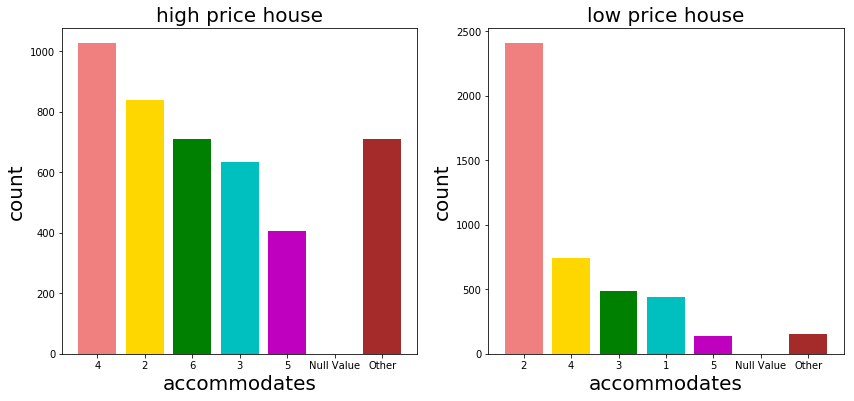

In [66]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[0])

### bathrooms
In general, most of the high price houses and low price houses only have one bathrooms, but on average, the high price houses have more bathrooms than low price houses

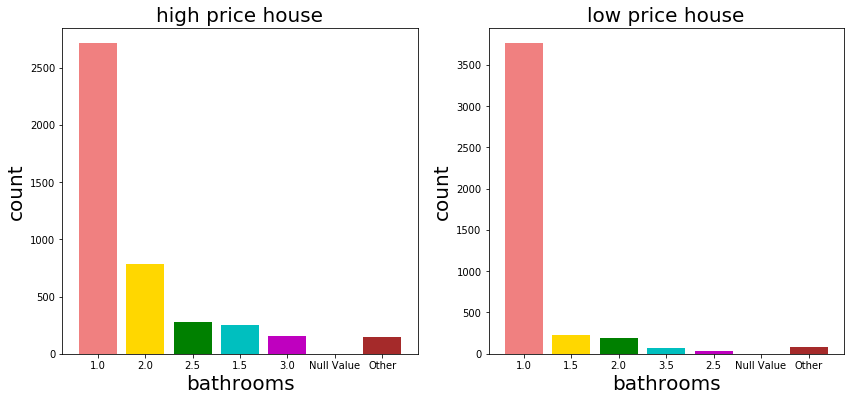

In [67]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[1])

### bedrooms
Be similar like bathrooms. The most houses wheather high price houses or low price houses have only one  bedrooms,but on average, the high price houses have more bethrooms than low price houses 

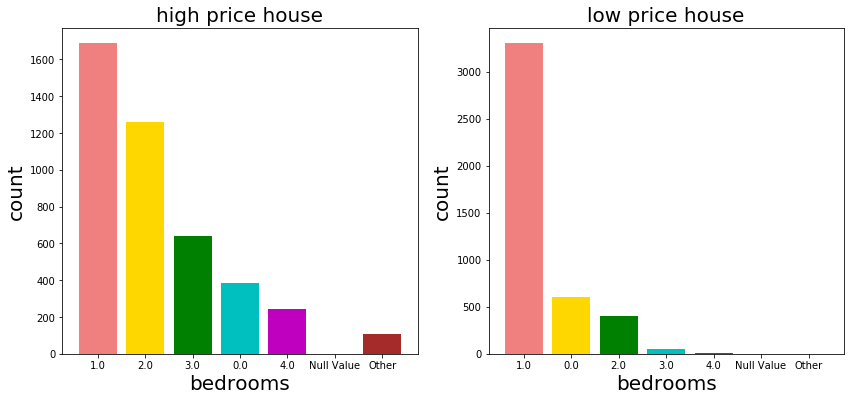

In [61]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[2])

### beds
In general, most of the high price houses and low price houses only have one beds , but on average, the high price houses have more beds than low price houses

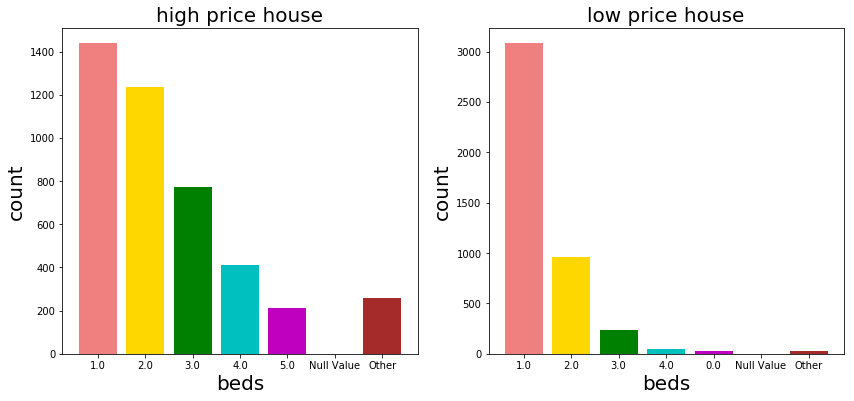

In [63]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[3])

### security deposit 
In general, the security deposit of high price houses is much more than low pirce houses

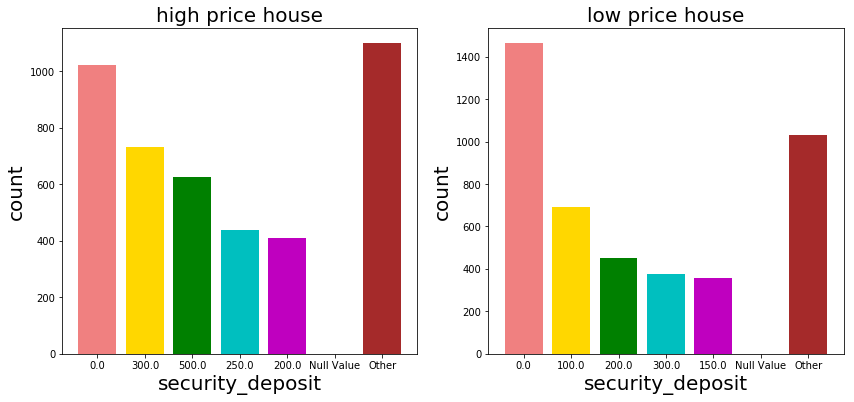

In [62]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[4])

### cleaning fee
In general, the cleaning fee of high price houses is much more than low pirce houses

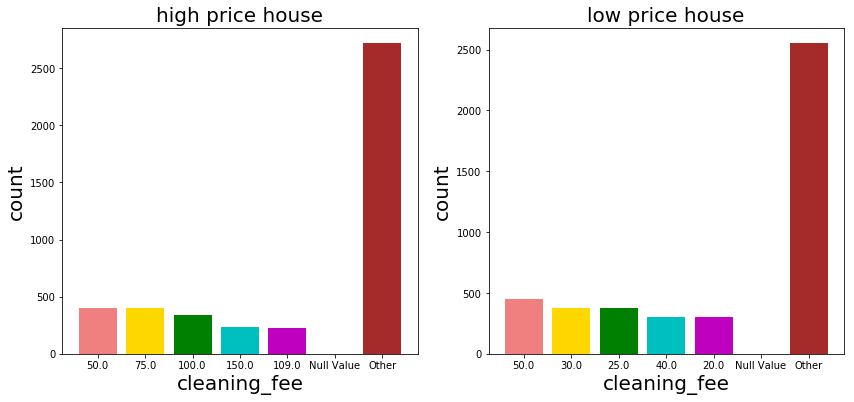

In [46]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[5])

### minimum_nights
In general, the minimum nights of high price houses is a little bit more than low pirce houeses

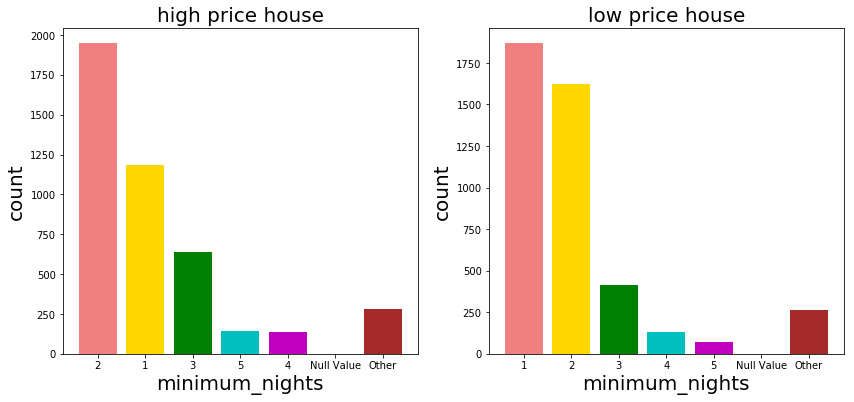

In [47]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[6])

### review scores cleanlines
In general, the review scores cleanlines of high price houses is a little bit less than low pirce houses

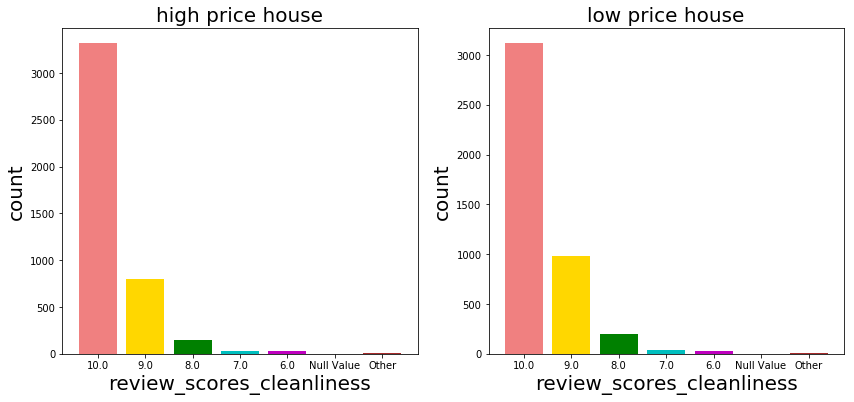

In [48]:
campare_plot(df_high_price_summary,df_low_price_summary,obs_cols[8])

### host_is_superhost_t
In general, the low pirce houses have more superhosts than high price houses.

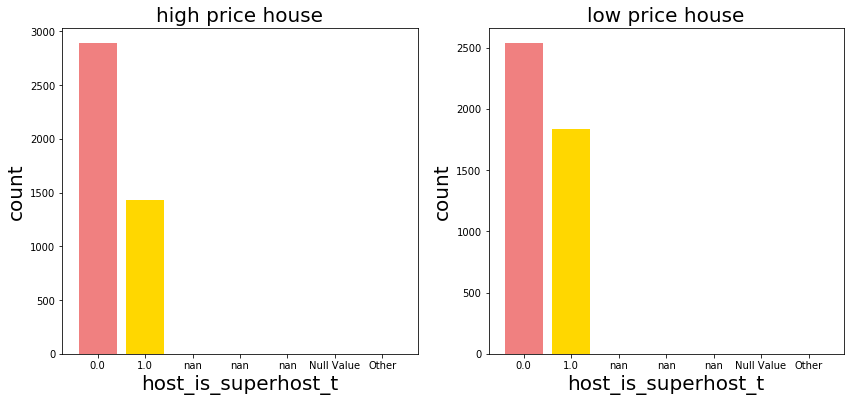

In [51]:
campare_plot(df_high_price_summary,df_low_price_summary,'host_is_superhost_t')

###  cancellation_policy_flexible 
In general, the low pirce houses have more cancellation policy flexible houses than high price houses.

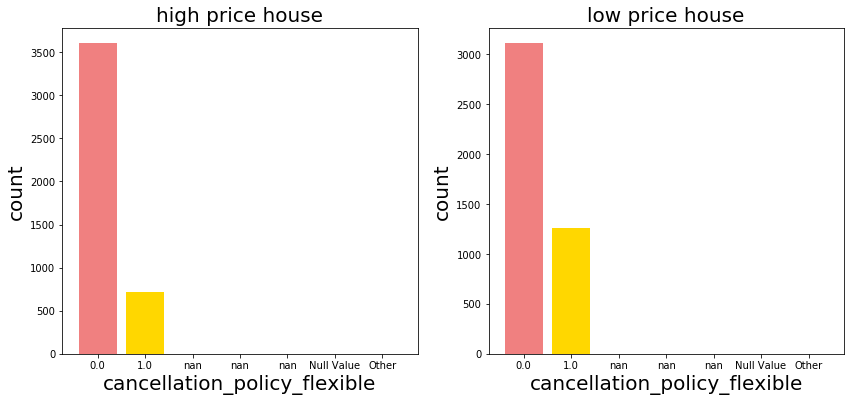

In [52]:
campare_plot(df_high_price_summary,df_low_price_summary,'cancellation_policy_flexible')

### review_scores_value
In general, the review scores value of high price houses is a little bit more than low pirce houeses,but not very much.

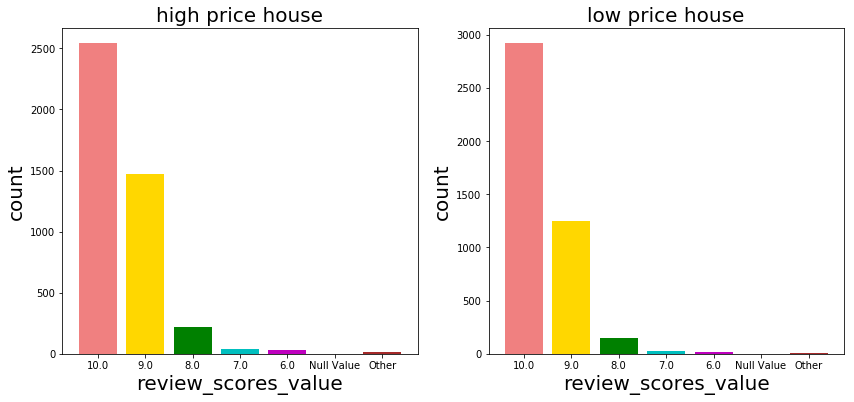

In [53]:
campare_plot(df_high_price_summary,df_low_price_summary,'review_scores_value')

### Question1 What's the differece between high price houses and low price houses?
### Conclusion
1. Household Appliances. The high price houses provide more facility than low price houses,like accommodates,bedrooms,bathrooms and beds.<br/>
2. House sevice. The low price houses performance better than the high price houses,for example,low price houses needs less cleaning fee than 
high price houses,and more proportion of low price houses' hosts are superhost. <br/>
3. review score value. The price dosen't influence review scores value very much.

## 5. Build Module(建立模型)
### Question2 If you are a low/high house host,what should you do to improve the review score value?<br/>


In [68]:

def ROC_AUC(df, score, target, plot=True):
    df2 = df.copy()
    s = list(set(df2[score]))
    s.sort()
    tpr_list = [0]
    fpr_list = [0]
    for k in s:
        df2['label_temp'] = df[score].map(lambda x: int(x >= k))
        TP = df2[(df2.label_temp==1) & (df2[target]==1)].shape[0]
        FN = df2[(df2.label_temp == 1) & (df2[target] == 0)].shape[0]
        FP = df2[(df2.label_temp == 0) & (df2[target] == 1)].shape[0]
        TN = df2[(df2.label_temp == 0) & (df2[target] == 0)].shape[0]
        try:
            TPR = TP / (TP + FN)
        except:
            TPR =0
        try:
            FPR = FP / (FP + TN)
        except:
            FPR = 0
        tpr_list.append(TPR)
        fpr_list.append(FPR)
    tpr_list.append(1)
    fpr_list.append(1)
    ROC_df = pd.DataFrame({'tpr': tpr_list, 'fpr': fpr_list})
    ROC_df = ROC_df.sort_values(by='tpr')
    ROC_df = ROC_df.drop_duplicates()
    auc = 0
    ROC_mat = np.mat(ROC_df)
    for i in range(1, ROC_mat.shape[0]):
        auc = auc + (ROC_mat[i, 1] + ROC_mat[i - 1, 1]) * (ROC_mat[i, 0] - ROC_mat[i - 1, 0]) * 0.5
    if plot:
        plt.plot(ROC_df['fpr'], ROC_df['tpr'])
        plt.plot([0, 1], [0, 1])
        plt.title("AUC={}%".format(int(auc * 100)))
    return auc

In [71]:
def GridSearch(X_train, X_test, y_train, y_test, criterion = ['mse'],tree_Flag = 'Regression',n_estimators = [300, 600],
                  method = 'RF', learning_rate = 0.5, validate = False, cv = 5,
                  max_features = ['auto'], max_depth = [10, 20, 40], min_samples_leaf = [2,4],min_samples_split = [10,20,40], n_jobs = -1):
    '''
    Usage: use gridsearch to find optimal parameters for the random forest (RF) regressor.
    Input: training and testing sets from X and y variables
    Output: the best regressor
    '''
    
    best_clf = np.NAN
    # 区分是回归模型
    if tree_Flag == 'regression':
        
        parameters = {'criterion': criterion,
                  'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'min_samples_leaf':min_samples_leaf,
                  'max_features':max_features,
                  'min_samples_split':min_samples_split
                 }
        
        clf = RandomForestRegressor(random_state=42, n_jobs = n_jobs)

        #Use gridsearch to find the best-model parameters.
        grid_obj = GridSearchCV(clf, parameters, cv = cv)
        grid_fit = grid_obj.fit(X_train, y_train)

        #obtaining best model, fit it to training set
        best_clf = grid_fit.best_estimator_
        best_clf.fit(X_train, y_train)

        # Make predictions using the new model.
        best_train_predictions = best_clf.predict(X_train)
        print('The training MSE Score is', mean_squared_error(y_train, best_train_predictions))
        print('The training R2 Score is', r2_score(y_train, best_train_predictions))

        if validate:
            best_test_predictions = best_clf.predict(X_test)
            print('The testing MSE Score is', mean_squared_error(y_test, best_test_predictions))
            print('The testing R2 Score is', r2_score(y_test, best_test_predictions))
            
    # 如果是分类模型
    elif tree_Flag == 'classifier':
        clf = RandomForestClassifier(oob_score=True)
       
        param_test1 = {'n_estimators':n_estimators}
    
        gsearch1 = GridSearchCV(estimator = RandomForestClassifier(),param_grid = param_test1, scoring='roc_auc',cv=5)
        gsearch1.fit(X_train, y_train)
        best_n_estimators = gsearch1.best_params_['n_estimators'] 
        
        param_test2 = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
        
        gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_n_estimators),param_grid = param_test2, scoring='roc_auc',cv=5)
        
        gsearch2.fit(X_train, y_train)
        
        best_max_depth, best_min_samples_split, best_min_samples_leaf = gsearch2.best_params_['max_depth'],gsearch2.best_params_['min_samples_leaf'],gsearch2.best_params_['min_samples_split']

        param_test3 ={'max_features':['sqrt','log2']}
        gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_n_estimators,
                                                                   max_depth = best_max_depth,
                                                                   min_samples_split = best_min_samples_split,
                                                                   min_samples_leaf = best_min_samples_leaf),
                                param_grid = param_test3, scoring='roc_auc',cv=5)
        gsearch3.fit(X_train,y_train)
        best_max_features = gsearch3.best_params_['max_features']

        best_clf = RandomForestClassifier(oob_score=True, n_estimators= best_n_estimators,
                                    max_depth = best_max_depth,min_samples_split = best_min_samples_split,
                                    min_samples_leaf = best_min_samples_leaf,max_features = best_max_features)
        
        best_clf.fit(X_train,y_train)
#         print(best_clf.oob_score_)
        y_predprob = best_clf.predict_proba(X_train)[:,1]
        result = pd.DataFrame({'real':y_train,'pred':y_predprob})
        #print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))
        auc = ROC_AUC(result, 'pred', 'real',False)
        
        print('The training Auc is', auc )
        
        if validate:
            y_predprob = best_clf.predict_proba(X_test)[:,1]
            result = pd.DataFrame({'real':y_test,'pred':y_predprob})
            #print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))
            auc = ROC_AUC(result, 'pred', 'real',False)
            print('The testing Auc is', auc )
        
    return best_clf

In [69]:
# 低房价变量重要性
df_low_price_X = df_low_price[obs_cols].drop(['review_scores_value'],axis = 1)
df_low_price_y = df_low_price[['review_scores_value']].iloc[:,0]
df_low_price_X_train, df_low_price_X_test, df_low_price_y_train, df_low_price_y_test = train_test_split(df_low_price_X, df_low_price_y, test_size = 0.3, random_state = 42)

In [73]:
# 低房价变量重要性
criterion = ['mse']
method = 'RF' 
n_estimators =  [200,400]
max_features = [10,15,22] 
max_depth = [10, 20, 40] 
min_samples_leaf = [2,4]
learning_rate = 0.001
tree_Flag = ''

best_clf = GridSearch(df_low_price_X_train, df_low_price_X_test, df_low_price_y_train, df_low_price_y_test,tree_Flag = 'regression', method = method, learning_rate = learning_rate, \
                         criterion = criterion, n_estimators = n_estimators, \
                         max_features = max_features, max_depth = max_depth, min_samples_leaf = min_samples_leaf)

The training MSE Score is 0.192866772348
The training R2 Score is 0.606054331449


In [ ]:
def show_importances(best_clf,df):

    importances = best_clf.feature_importances_ 
    feat_names = df.columns
    tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
    tree_result.sort_values(by='importance',ascending=True)[-10:].plot(x='feature', y='importance', kind='barh')

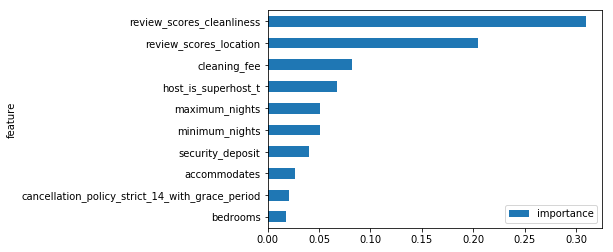

In [74]:
show_importances(best_clf,df_low_price_X_train

In [75]:
#  高房价变量重要性
df_high_price_X = df_high_price[obs_cols].drop(['review_scores_value'],axis = 1)
df_high_price_y = df_high_price[['review_scores_value']].iloc[:,0]
df_high_price_X_train, df_high_price_X_test, df_high_price_y_train, df_high_price_y_test = train_test_split(df_high_price_X, df_high_price_y, test_size = 0.3, random_state = 42)

In [76]:
criterion = ['mse']
method = 'RF' 
n_estimators =  [200,400]
max_features = [10,15,22] 
max_depth = [10, 20, 40] 
min_samples_leaf = [2,4]
learning_rate = 0.001

best_clf = GridSearch(df_high_price_X_train, df_high_price_X_test, df_high_price_y_train, df_high_price_y_test, tree_Flag = 'regression',method = method, learning_rate = learning_rate, \
                         criterion = criterion, n_estimators = n_estimators, \
                         max_features = max_features, max_depth = max_depth, min_samples_leaf = min_samples_leaf)

The training MSE Score is 0.393556304165
The training R2 Score is 0.393457562855


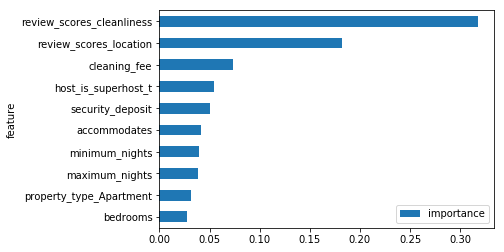

In [77]:

show_importances(best_clf,df_high_price_X_train)

### Question2 If you are a low/high house host,what should you do to improve the review score value?
### Conclusion
1. From the pictures above,we can see both high price houses' users and low price houses' users care about <br/>
review_scores_cleanliness,review_scores_cleanliness,cleaning_fee,security_deposit,maximum_nights,minimum_nights.accommodates. <br/>
2. If you are a low price houses's host,you should try to be a superhost at first,and then maybe you should not make your the houses cancellation policy to be a strict grace period. <br/>
3. If you are a high price houses' host , more care about beds,and bedrooms,and wheather the house is a Apartment.

## Question3 What features influence host to a superhost while the house is a high or low price house?

In [78]:
# 低房价变量重要性
df_low_price_X = df_low_price[obs_cols].drop(['host_is_superhost_t'],axis = 1)
df_low_price_y = df_low_price[['host_is_superhost_t']].iloc[:,0]
df_low_price_X_train, df_low_price_X_test, df_low_price_y_train, df_low_price_y_test = train_test_split(df_low_price_X, df_low_price_y, test_size = 0.3, random_state = 42)

In [79]:
criterion = ['gini']
method = 'RF' 
n_estimators =  [200,400]
max_features = [10,15,22] 
max_depth = [10, 20, 40] 
min_samples_split = [10,20,40]
min_samples_leaf = [2,4]
learning_rate = 0.001

best_clf = GridSearch(df_low_price_X_train, df_low_price_X_test, df_low_price_y_train, df_low_price_y_test,tree_Flag = 'classifier', method = method, learning_rate = learning_rate, \
                         criterion = criterion, n_estimators = n_estimators, \
                         max_features = max_features, max_depth = max_depth, min_samples_leaf = min_samples_leaf,min_samples_split = min_samples_split)

The training Auc is 0.908833612531


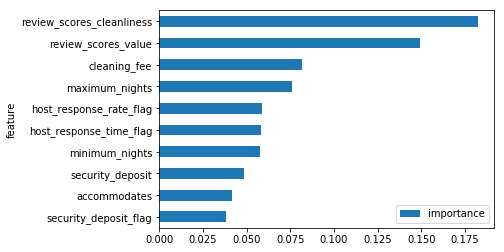

In [80]:
show_importances(best_clf,df_low_price_X_train)

In [81]:
#  高房价变量重要性
df_high_price_X = df_high_price[obs_cols].drop(['host_is_superhost_t'],axis = 1)
df_high_price_y = df_high_price[['host_is_superhost_t']].iloc[:,0]
df_high_price_X_train, df_high_price_X_test, df_high_price_y_train, df_high_price_y_test = train_test_split(df_high_price_X, df_high_price_y, test_size = 0.3, random_state = 42)

In [82]:
criterion = ['gini']
method = 'RF' 
n_estimators =  [200,400]
max_features = [10,15,22] 
max_depth = [10, 20, 40] 
min_samples_split = [10,20,40]
min_samples_leaf = [2,4]
learning_rate = 0.001

best_clf = GridSearch(df_high_price_X_train, df_high_price_X_test, df_high_price_y_train, df_high_price_y_test,tree_Flag = 'classifier', method = method, learning_rate = learning_rate, \
                         criterion = criterion, n_estimators = n_estimators, \
                         max_features = max_features, max_depth = max_depth, min_samples_leaf = min_samples_leaf,min_samples_split = min_samples_split)

The training Auc is 0.933900935805


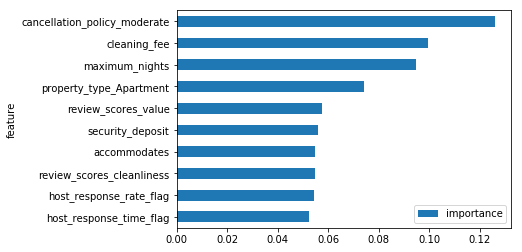

In [45]:
show_importances(best_clf,df_high_price_X_train)

## Question3 If we are the house hosts,If we want to be a superhost,what should we do while we are high price house host or low price house host?

From the figtures above,we can see that both of low/high price house's hosts are been influenced by cleaning_fee,maximum_nights,review_scores_value,secutity_deposit,review_scores_cleanliness,host_reponse_rate_flag,host_reponse_time_flag.
So if we want to be superhost,there have not much different between low price houses and high price houses 
